<a href="https://colab.research.google.com/github/EisaacJC/ComputerVision/blob/main/Vision_por_computadora_5_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image enhancement using intensity transformations





In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import cv2
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img = cv2.imread("/content/drive/MyDrive/Tarea56/Fig3.08(a).jpg", 0)
img1 = cv2.imread("/content/drive/MyDrive/Tarea56/Fig3.15(a)1top.jpg", 0)
img2 = cv2.imread("/content/drive/MyDrive/Tarea56/Fig3.15(a)2.jpg", 0)
img3 = cv2.imread("/content/drive/MyDrive/Tarea56/Fig3.15(a)3.jpg", 0)
img4 = cv2.imread("/content/drive/MyDrive/Tarea56/Fig3.15(a)4.jpg", 0)
img5=cv2.imread("/content/drive/MyDrive/Tarea56/paisaje.jpg", 0)

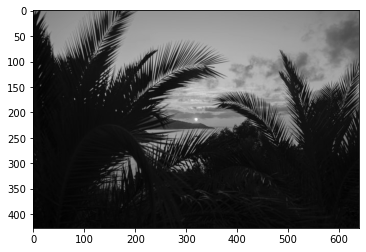

In [ ]:
plt.imshow(img5, cmap="gray")

In [ ]:
img

array([[0, 1, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 1, 0],
       [1, 1, 0, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 0, 0]], dtype=uint8)

# Power Law Enhancement

In [ ]:
def powerenhancement(c, gamma, img):
    copy=img.copy()
    for i in range(0,img.shape[0]):
        for j in range(0, img.shape[1]):
            copy[i,j]=c*img[i,j]**gamma
    return copy

In [ ]:
imgs=[]
for i in range(0,10):
    imgs.append(powerenhancement(1, i/10, img))

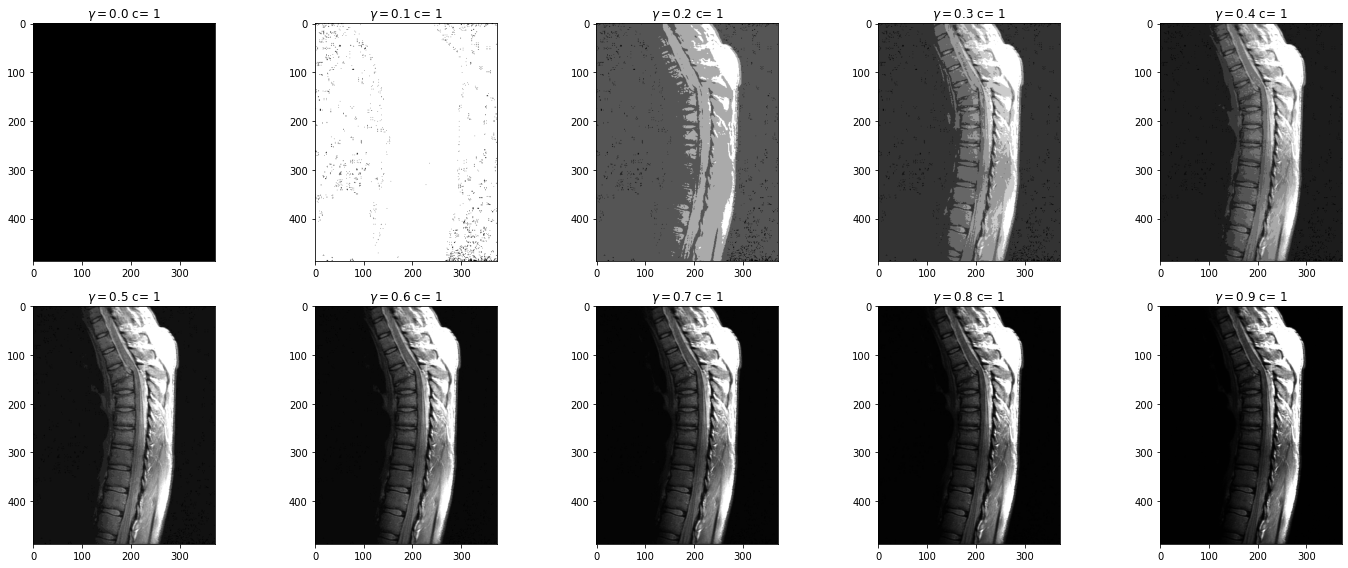

In [ ]:
plt.rcParams["figure.figsize"] = (20,8)
c=[i/10 for i in range(10)]
rows = 2
cols = 5
axes=[]
fig=plt.figure()
for a in range(rows*cols):
    b=imgs[a]
    axes.append( fig.add_subplot(rows, cols, a+1) )
    if a==10:
        subplot_title=("Imagen original:")
    else:
        subplot_title=("$\gamma=$"+str(c[a])+" c= 1")

    axes[-1].set_title(subplot_title)  
    plt.imshow(b, cmap="gray")
fig.tight_layout()    

plt.show()

In [ ]:
imgs=[]
for i in range(0,10):
    imgs.append(powerenhancement(.9, i/10, img))

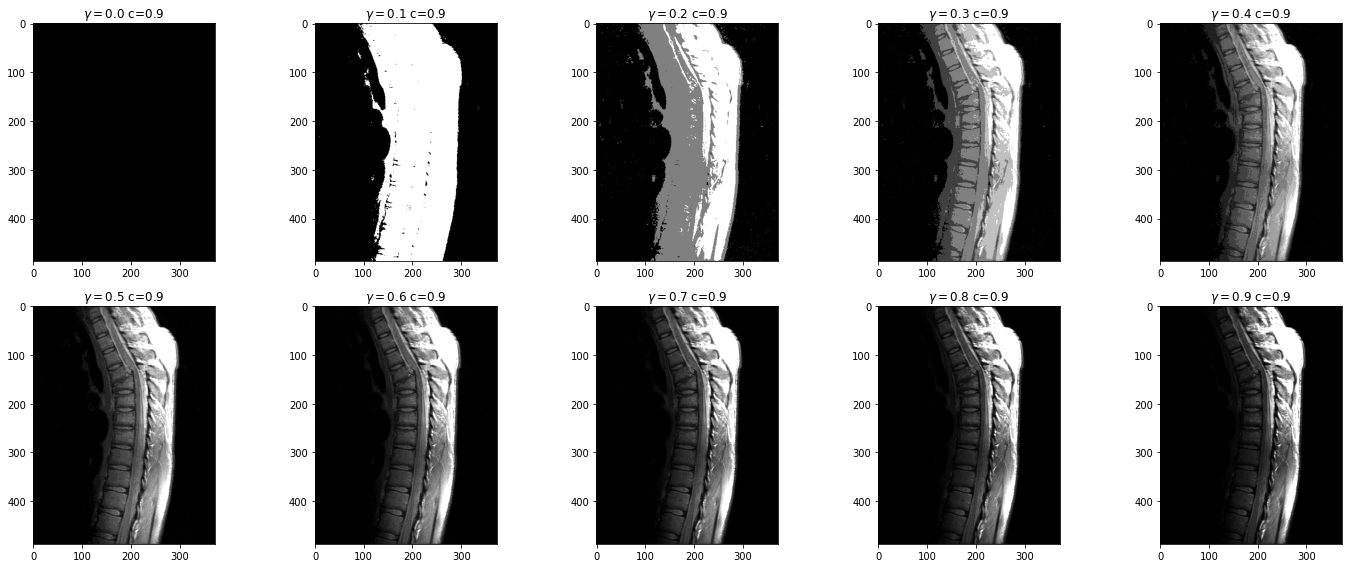

In [ ]:
plt.rcParams["figure.figsize"] = (20,8)
c=[i/10 for i in range(10)]
rows = 2
cols = 5
axes=[]
fig=plt.figure()
for a in range(rows*cols):
    b=imgs[a]
    axes.append( fig.add_subplot(rows, cols, a+1) )
    if a==10:
        subplot_title=("Imagen original:")
    else:
        subplot_title=("$\gamma=$"+str(c[a])+" c="+str(0.9))

    axes[-1].set_title(subplot_title)  
    plt.imshow(b, cmap="gray")
fig.tight_layout()    

plt.show()

# Log enhancement

In [ ]:
def logenhancement(c,img):
    copy=img.copy()
    for i in range(0,img.shape[0]):
        for j in range(0, img.shape[1]):
            copy[i,j]=c*np.log(1+img[i,j])
    return copy

In [ ]:
imgs2=[]
for i in range(0,10):
    imgs2.append(logenhancement(i/10, img))

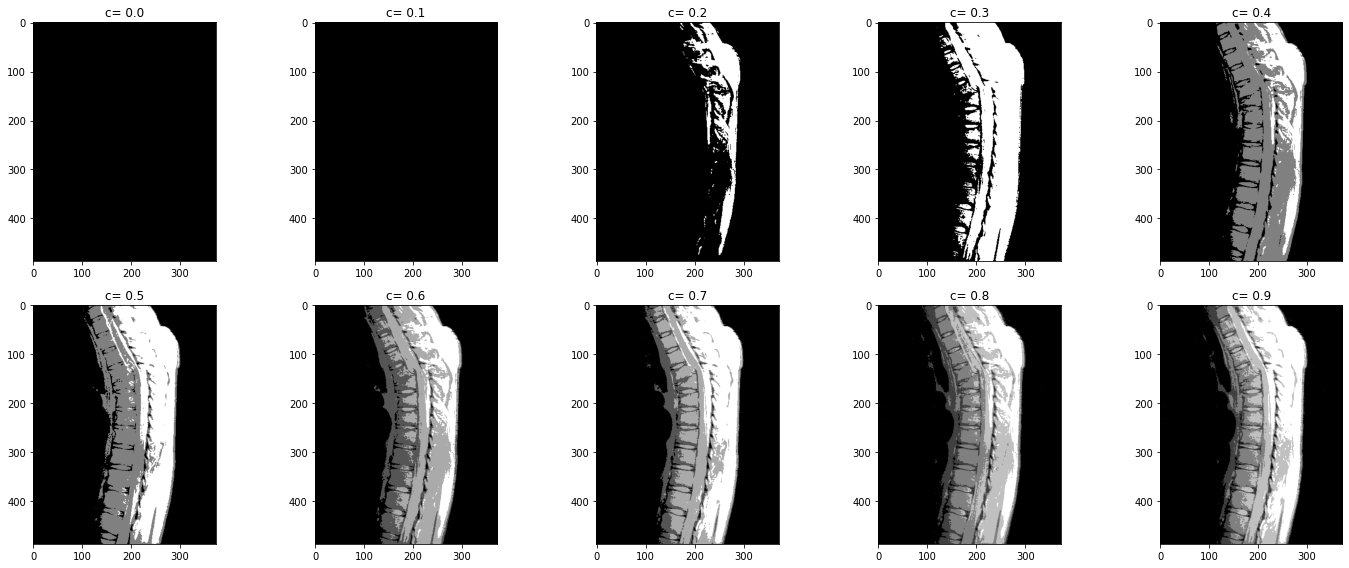

In [ ]:
plt.rcParams["figure.figsize"] = (20,8)
c=[i/10 for i in range(10)]
rows = 2
cols = 5
axes=[]
fig=plt.figure()
for a in range(rows*cols):
    b=imgs2[a]
    axes.append( fig.add_subplot(rows, cols, a+1) )
    if a==10:
        subplot_title=("Imagen original:")
    else:
        subplot_title=("c= "+str(c[a]))

    axes[-1].set_title(subplot_title)  
    plt.imshow(b, cmap="gray")
fig.tight_layout()    

plt.show()

In [ ]:
imgs3=[]
for i in range(0,10):
    imgs3.append(logenhancement(i/10, img5))

In [ ]:
imgs4=[]
for i in range(0,10):
    imgs4.append(powerenhancement(.9, i/10, img5))

In [ ]:
def multiple_graphs(images):
    plt.rcParams["figure.figsize"] = (20,8)
    c=[i/10 for i in range(10)]
    rows = 2
    cols = 5
    axes=[]
    fig=plt.figure()
    for a in range(rows*cols):
        b=images[a]
        axes.append( fig.add_subplot(rows, cols, a+1) )
        if a==10:
            subplot_title=("Imagen original:")
        else:
            subplot_title=("c= "+str(c[a]))

        axes[-1].set_title(subplot_title)  
        plt.imshow(b, cmap="gray")
    fig.tight_layout()    
    plt.show()
    return 1

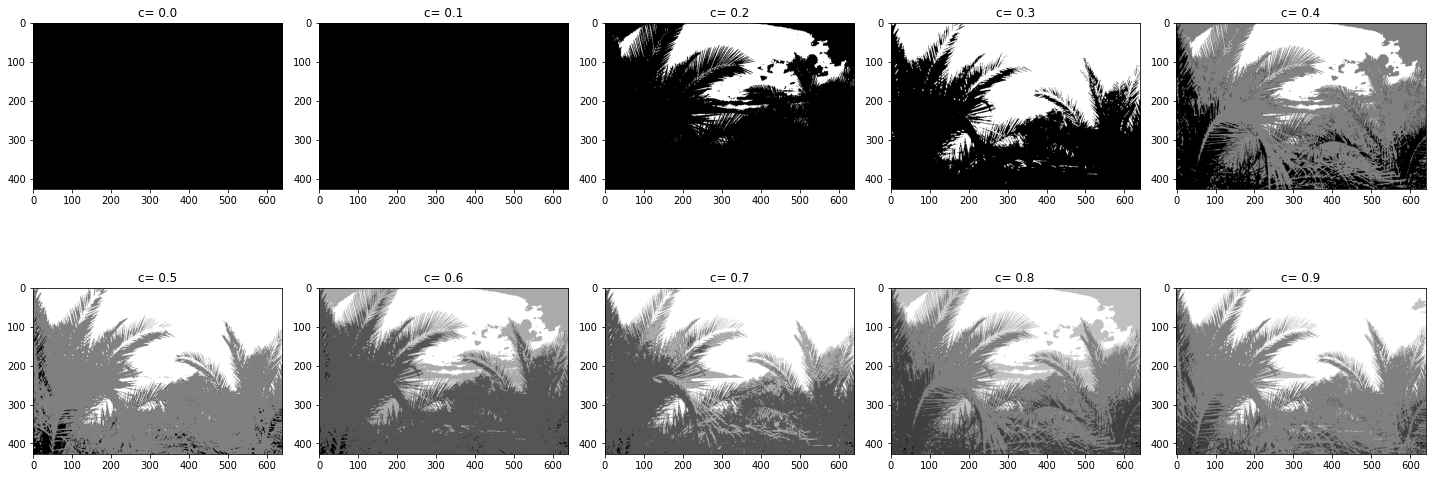

1

In [ ]:
multiple_graphs(imgs3)

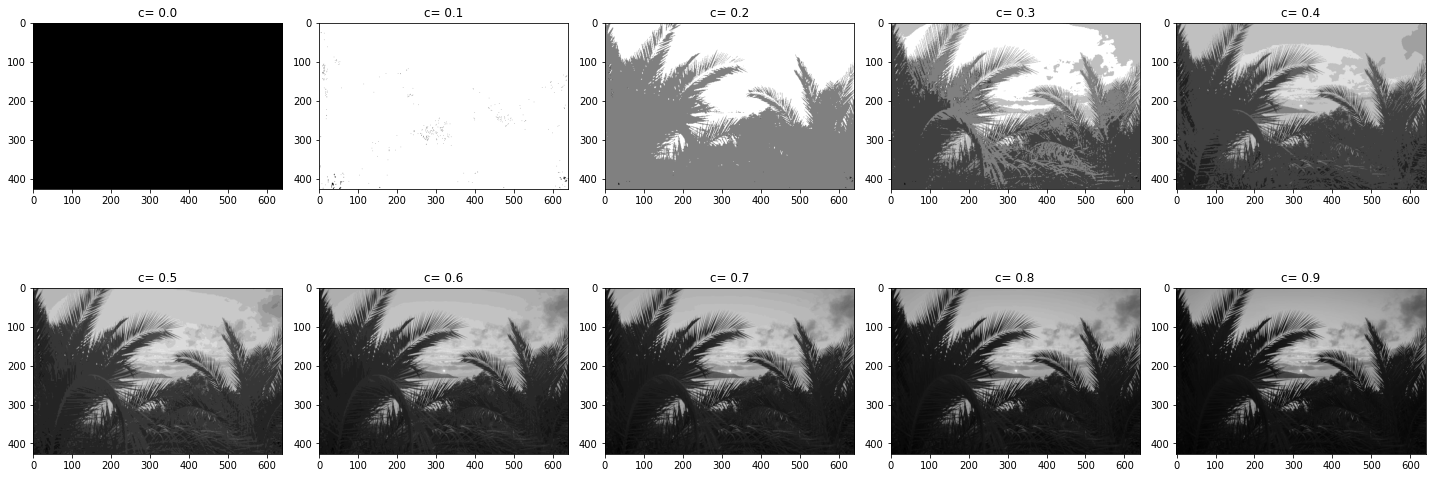

1

In [ ]:
multiple_graphs(imgs4)

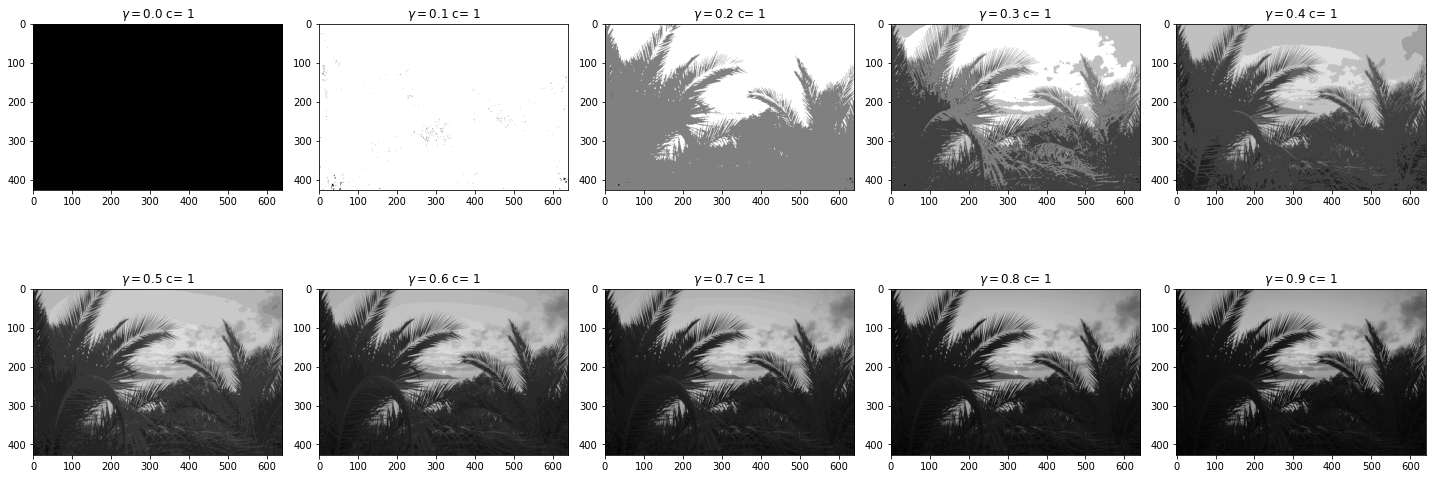

In [ ]:
plt.rcParams["figure.figsize"] = (20,8)
c=[i/10 for i in range(10)]
rows = 2
cols = 5
axes=[]
fig=plt.figure()
for a in range(rows*cols):
    b=imgs4[a]
    axes.append( fig.add_subplot(rows, cols, a+1) )
    if a==10:
        subplot_title=("Imagen original:")
    else:
        subplot_title=("$\gamma=$"+str(c[a])+" c= 1")

    axes[-1].set_title(subplot_title)  
    plt.imshow(b, cmap="gray")
fig.tight_layout()    

plt.show()

# Tarea 6

In [ ]:
def histograma(img, bins):
    #copy=img.reshape((1, img.shape[0]*img.shape[1]))
    a=plt.hist(img.flatten(), bins=bins, log=1, color="r", rwidth=0.4)
    return plt.show(a)

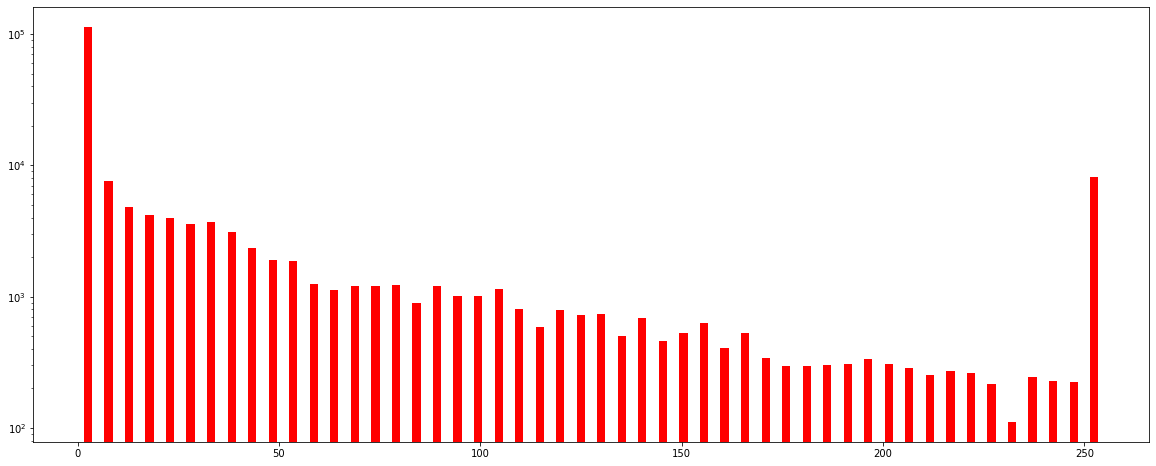

In [ ]:
histograma(img, 50)

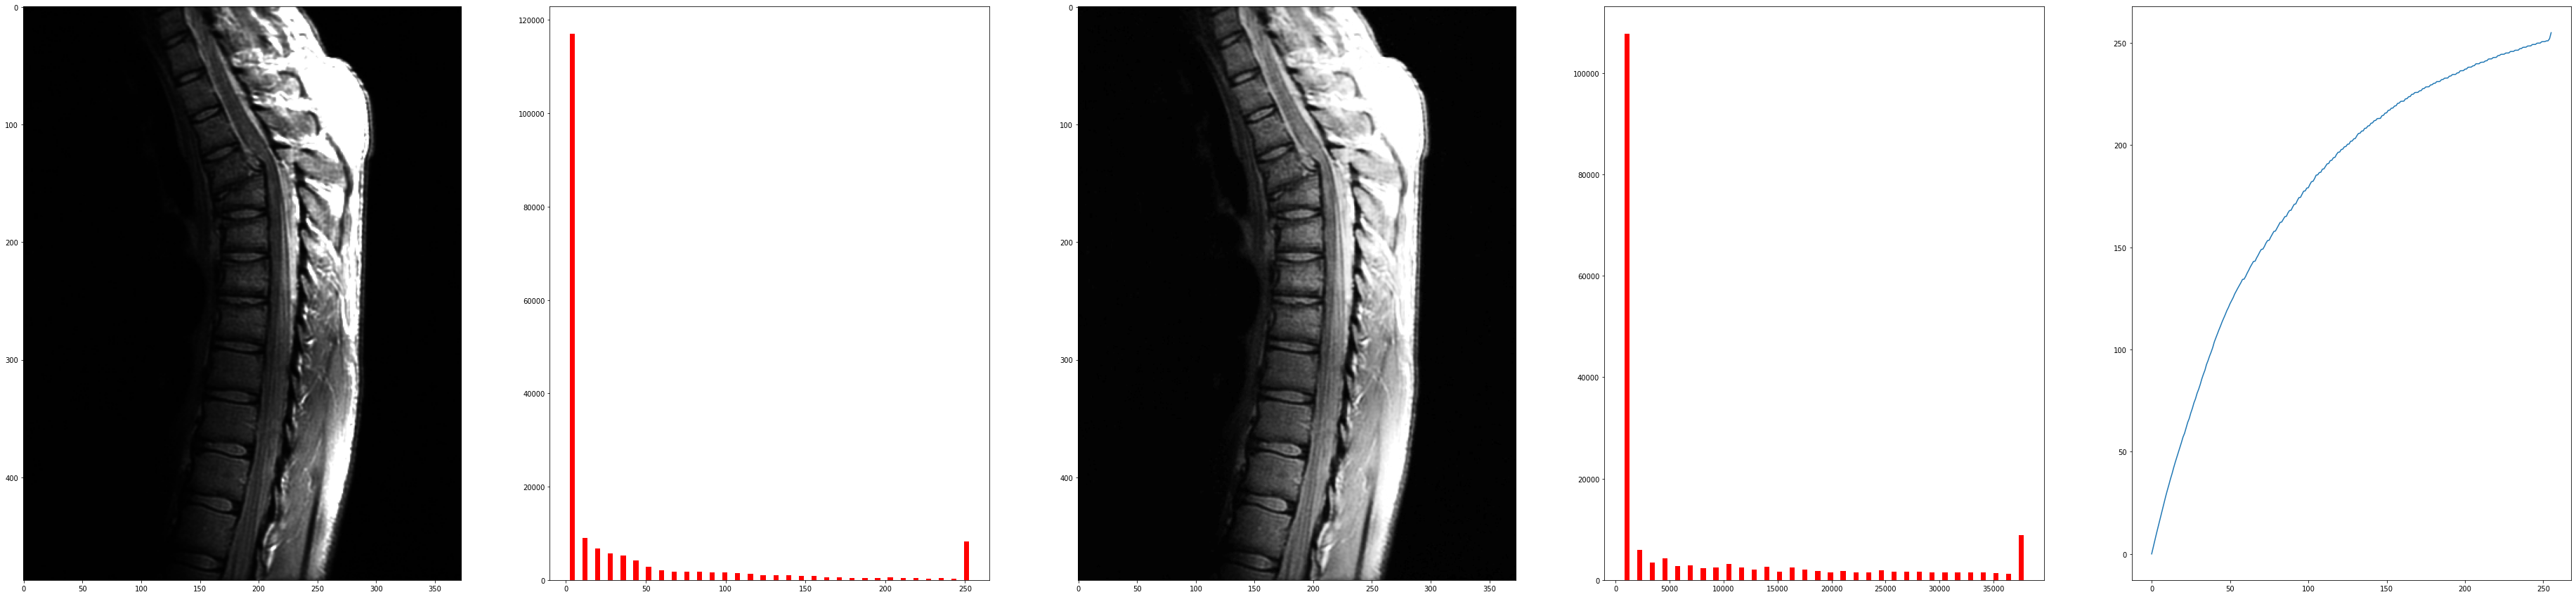

1

In [ ]:
def histogram(img, bins):
    def acumulativo(hist):
        hist = iter(hist)
        bins = [next(hist)]
        for i in hist:
            bins.append(bins[-1] + i)
        return np.array(bins)
    histograma = np.zeros(bins)
    for pixel in img:
        histograma[pixel] += 1
    ac=acumulativo(histograma)
    acprim=(ac-ac.min())*255/(ac.max()-ac.min())
    copy=ac[img]
    copy=np.reshape(copy, img.shape)
    fig = plt.figure()
    fig.set_figheight(15)
    fig.set_figwidth(65)
    fig.add_subplot(1,5,1)
    plt.imshow(img, cmap='gray')
    fig.add_subplot(1,5,2)
    plt.hist(img.flatten(), bins=int(bins/8), log=0, color="r", rwidth=0.4)
    fig.add_subplot(1,5,3)
    plt.imshow(copy, cmap='gray')
    fig.add_subplot(1,5,4)
    plt.hist(copy.flatten(), bins=int(bins/8), log=0, color="r", rwidth=0.4)
    fig.add_subplot(1,5,5)
    plt.plot(acprim)
    plt.show(block=True)
    return  1
histogram(img, 256)

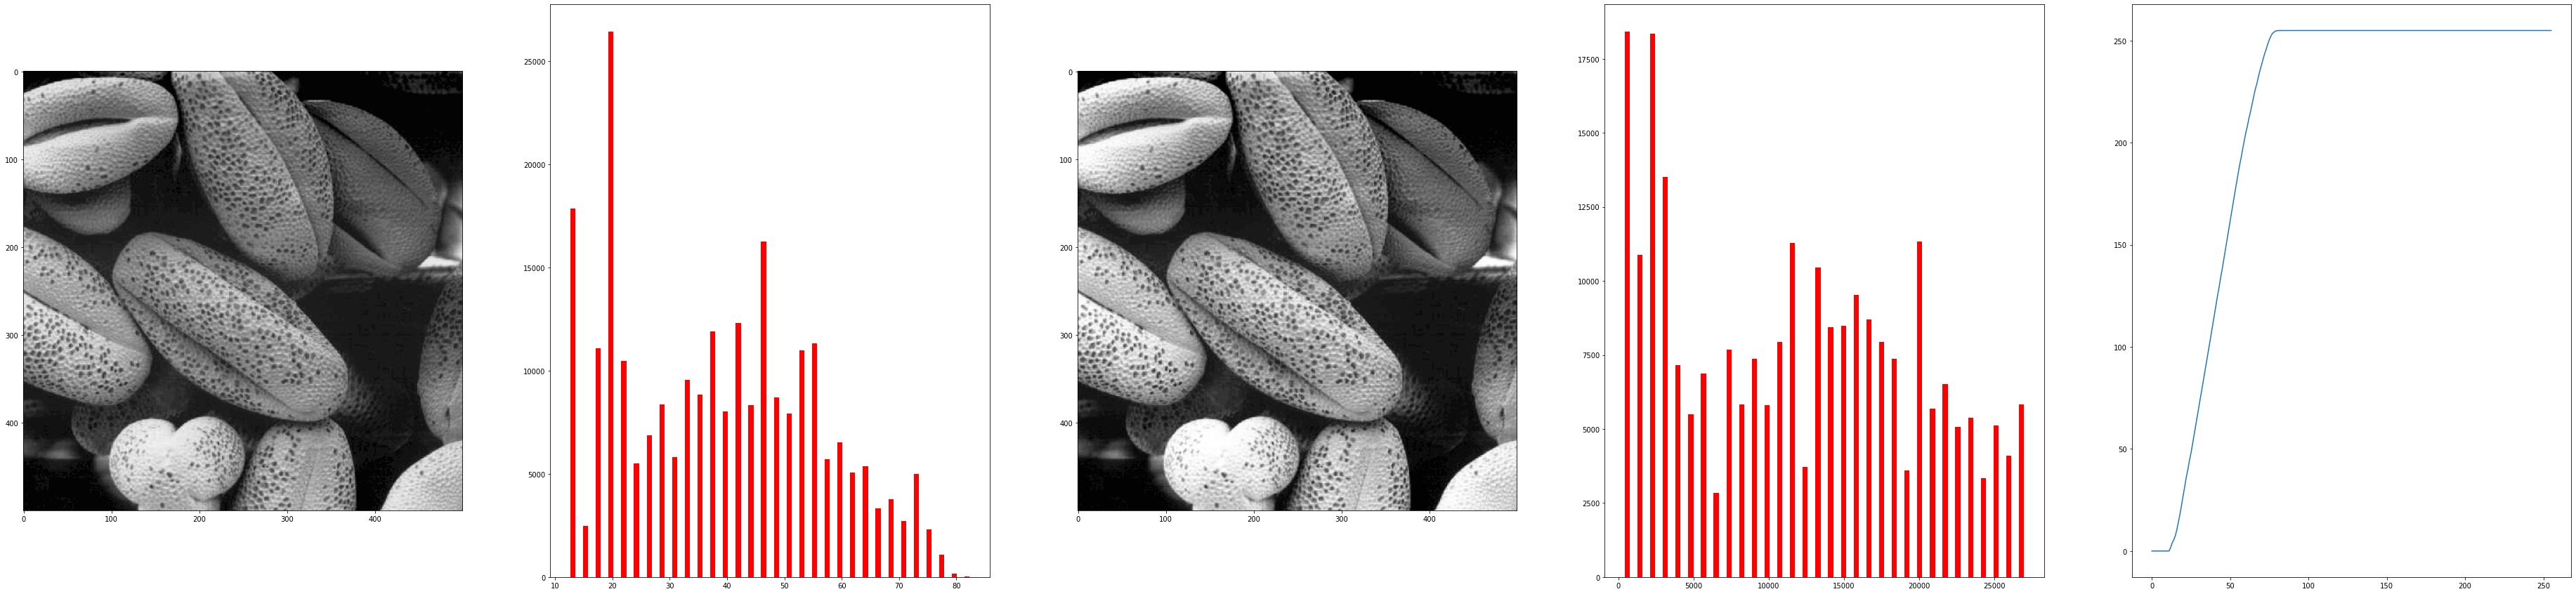

1

In [ ]:
histogram(img1, 256)

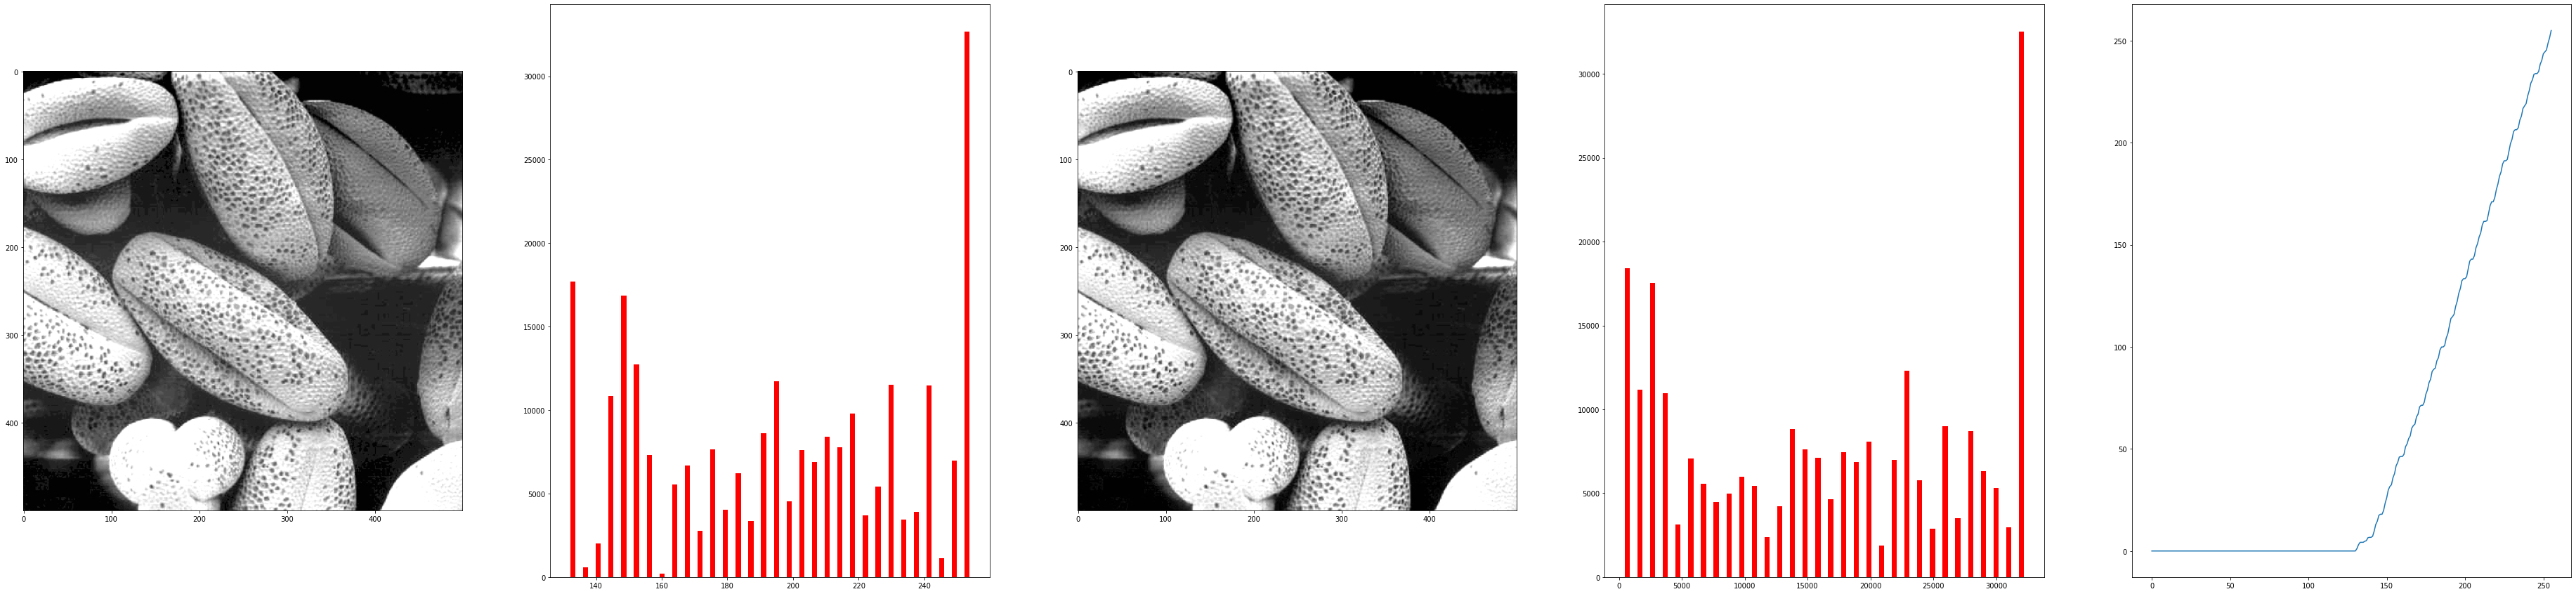

1

In [ ]:
histogram(img2, 256)

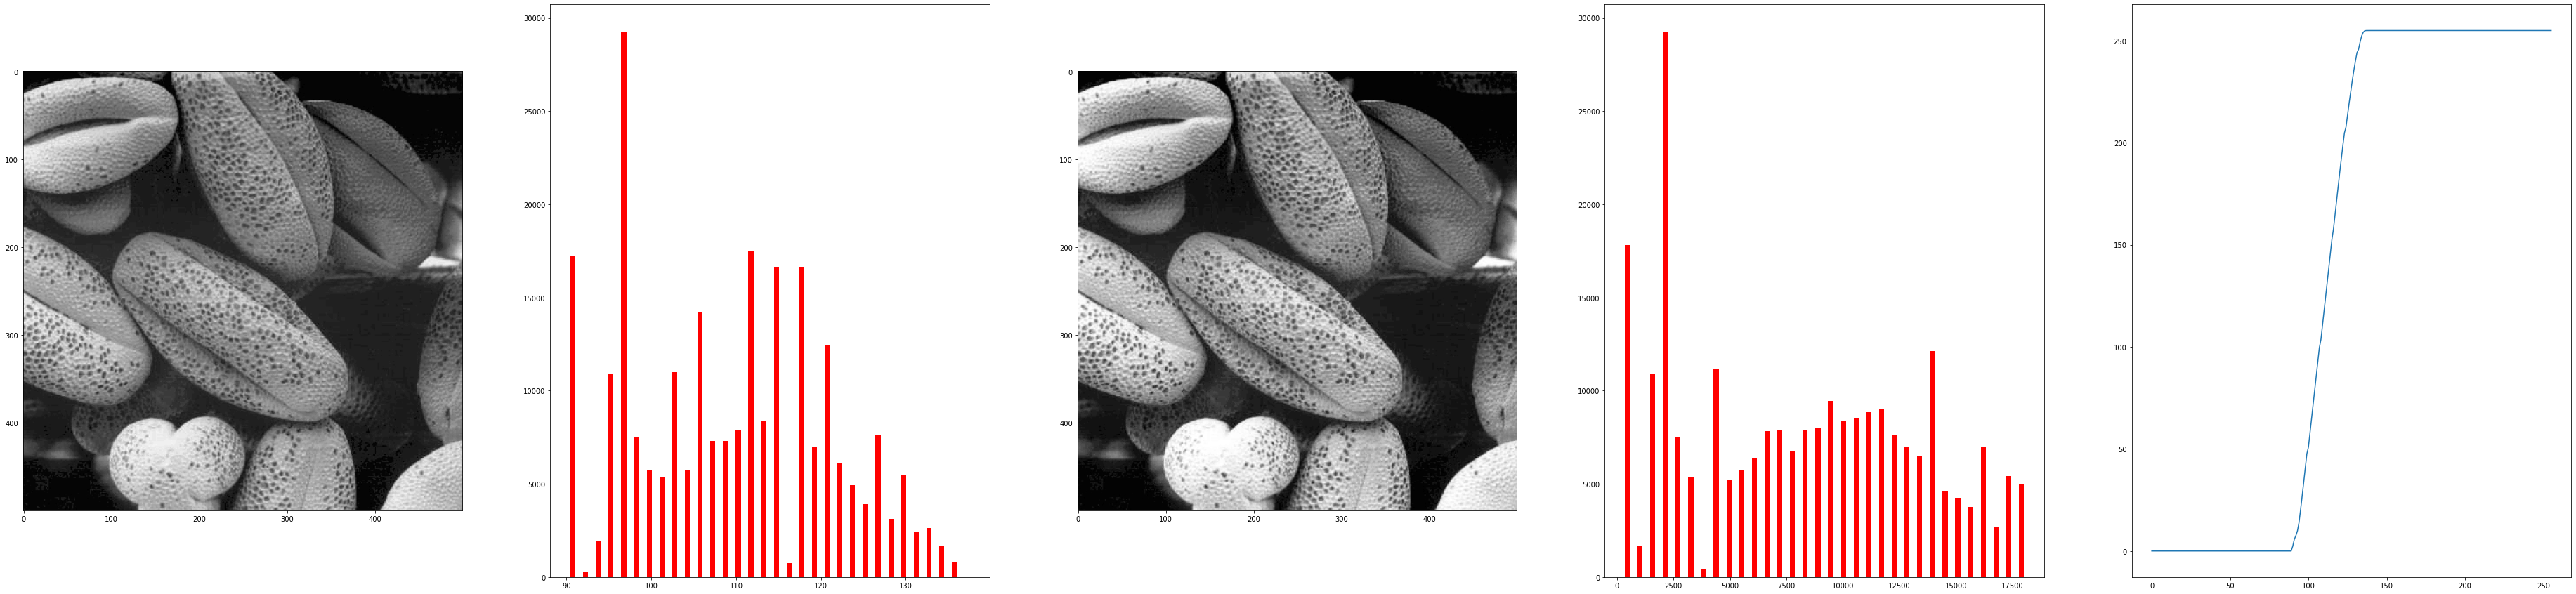

1

In [ ]:
histogram(img3, 256)

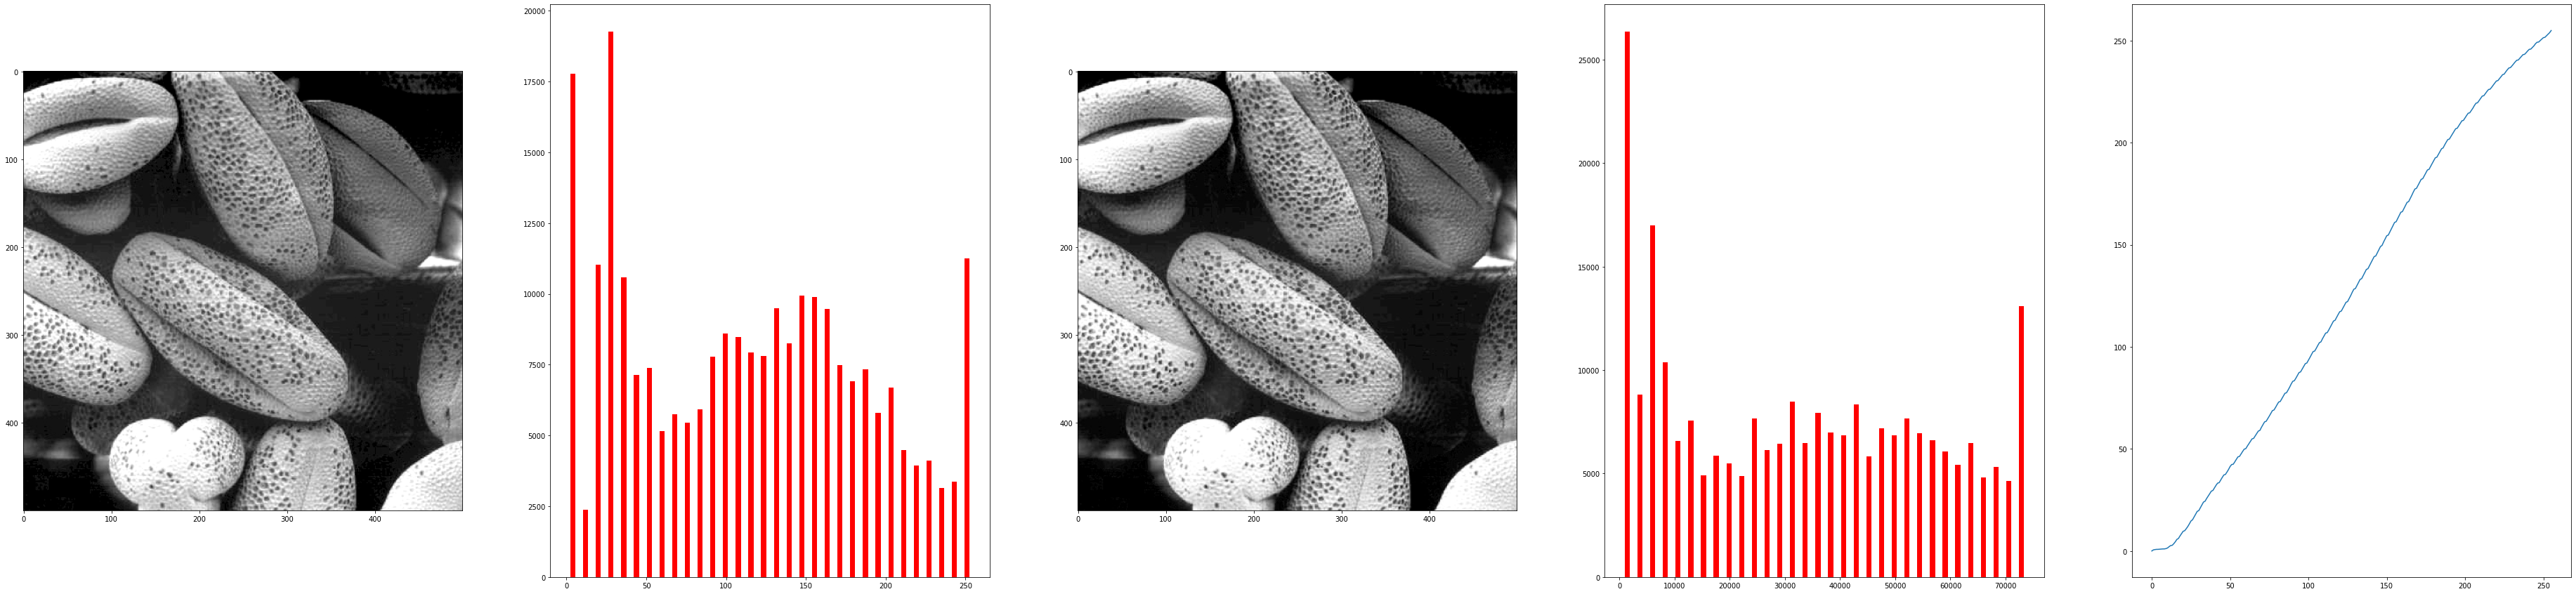

1

In [ ]:
histogram(img4, 256)

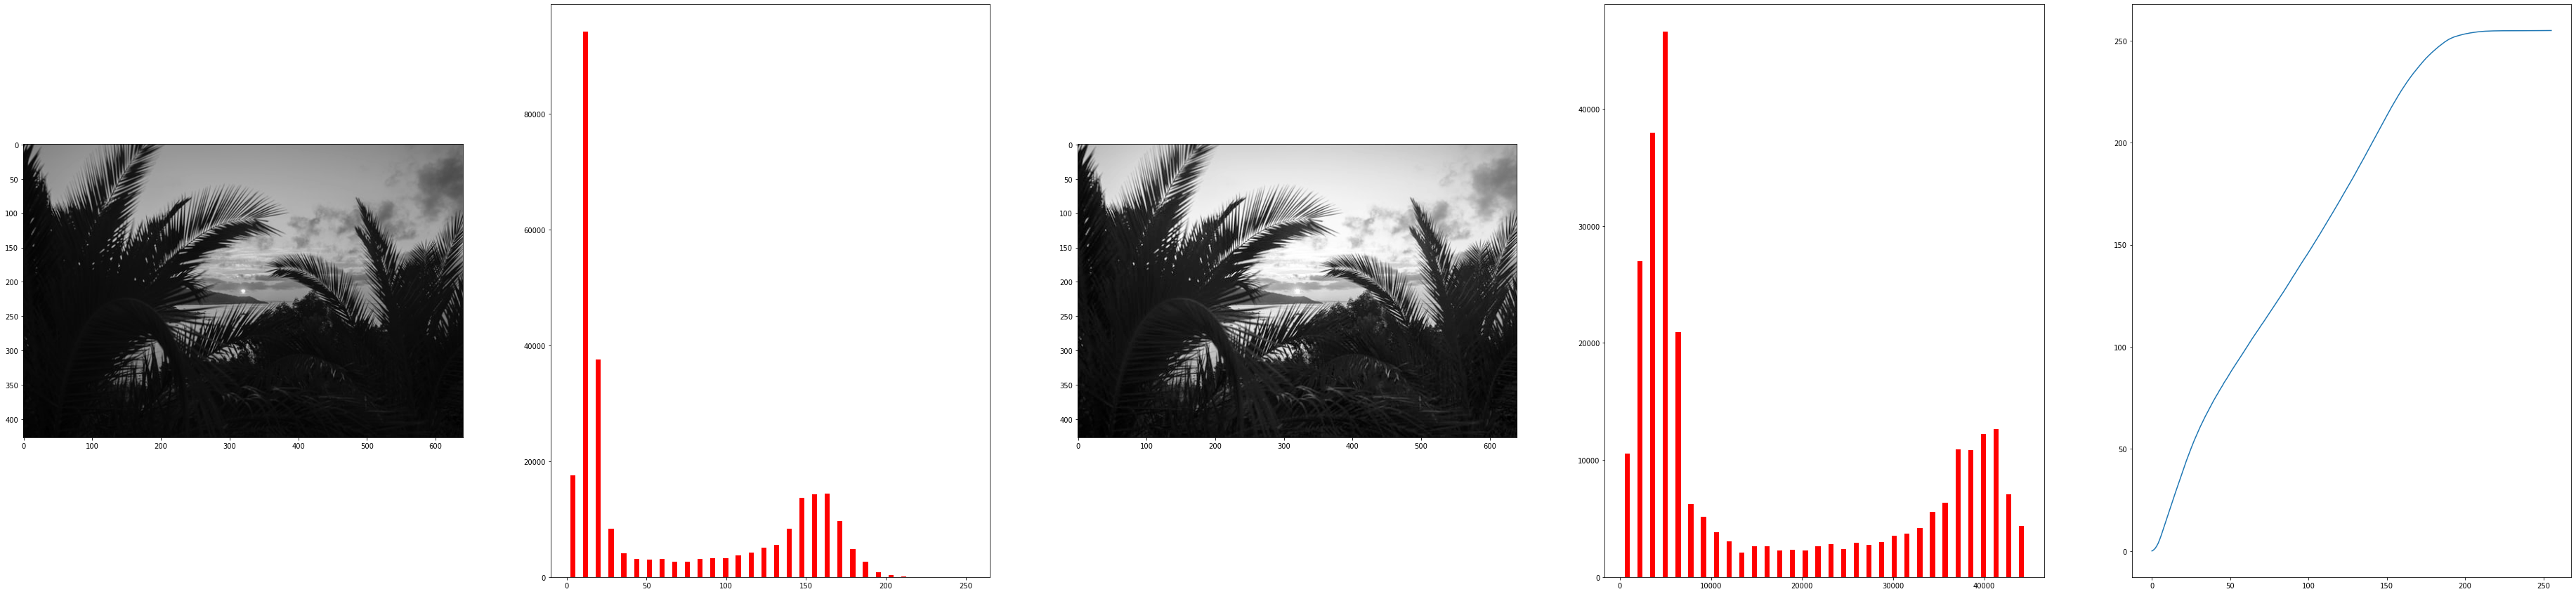

1

In [ ]:
histogram(img5, 256)

In [ ]:
D